# Removing Trends - Lab

## Introduction

In this lab, you'll practice your detrending skills!

## Objectives

You will be able to:
* Learn how to remove trends and seasonality
* Use a log transformation to minimize non-stationarity
* Use rolling means to reduce non-stationarity
* Use differencing to reduce non-stationarity

## Detrending the Airpassenger data

In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import passengers.csv and set it as a time-series object. Plot the TS
df = pd.read_csv('passengers.csv')
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [22]:
df.Month = pd.to_datetime(df.Month)
df = df.set_index('Month')
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Create a stationarity check

At this stage, we can use the code from previous labs to create a function `stationarity_check(ts)` that takes in a time series object and performs stationarity checks including rolling statistics and the Dickey Fuller test. 

We want the output of the function to:
- Plot the original time series along with the rolling mean and rolling standard deviation in one plot
- Output the results of the Dickey-Fuller test

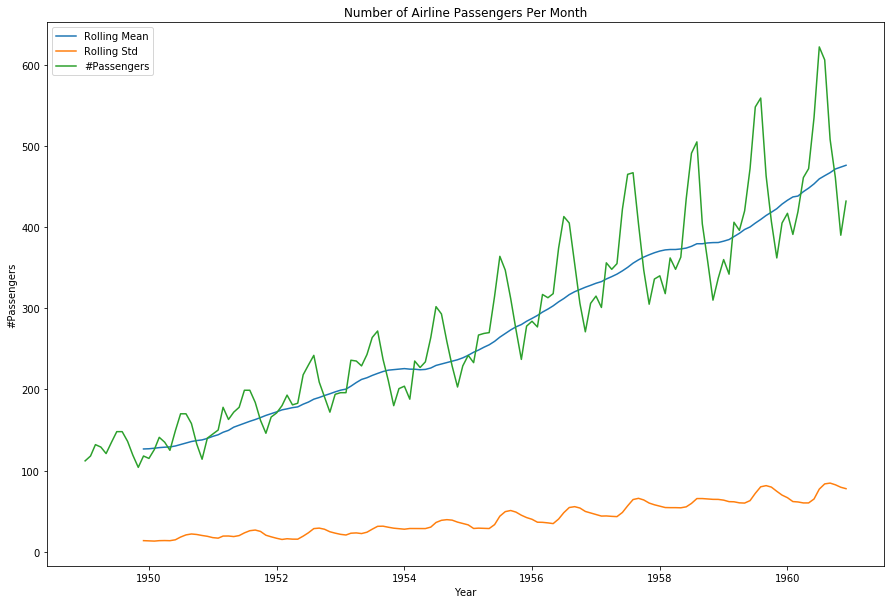

In [23]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab
#Determine rolling statistics
rolmean = df.rolling(window = 12, center = False).mean()
rolstd = df.rolling(window = 12, center = False).std()

plt.figure(figsize=(15, 10))
plt.plot(rolmean, label='Rolling Mean')
plt.plot(rolstd, label='Rolling Std')
plt.plot(df, label='#Passengers')
plt.title('Number of Airline Passengers Per Month')
plt.xlabel('Year')
plt.ylabel('#Passengers')
plt.legend()
plt.show()

In [24]:
from statsmodels.tsa.stattools import adfuller
from pprint import pprint
#Perform Dickey-Fuller test:

def check_stationarity(df):
    test = adfuller(df['#Passengers'])

    # Extract and display test results in a user friendly manner
    labels = [
        'Test statistic',
        'p-value',
        '#Lags Used',
        'Number of Observations Used',
        'Critical Value'
    ]
    d = {l: v for l, v in zip(labels, test)}
    print('Results of Dickey-Fuller Test:')
    pprint(d)
    return d
check_stationarity(df)

Results of Dickey-Fuller Test:
{'#Lags Used': 13,
 'Critical Value': {'1%': -3.4816817173418295,
                    '10%': -2.578770059171598,
                    '5%': -2.8840418343195267},
 'Number of Observations Used': 130,
 'Test statistic': 0.8153688792060543,
 'p-value': 0.9918802434376411}


{'Test statistic': 0.8153688792060543,
 'p-value': 0.9918802434376411,
 '#Lags Used': 13,
 'Number of Observations Used': 130,
 'Critical Value': {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598}}

Use your newly created function on the airpassenger data set.

## Perform a log() and sqrt() transform

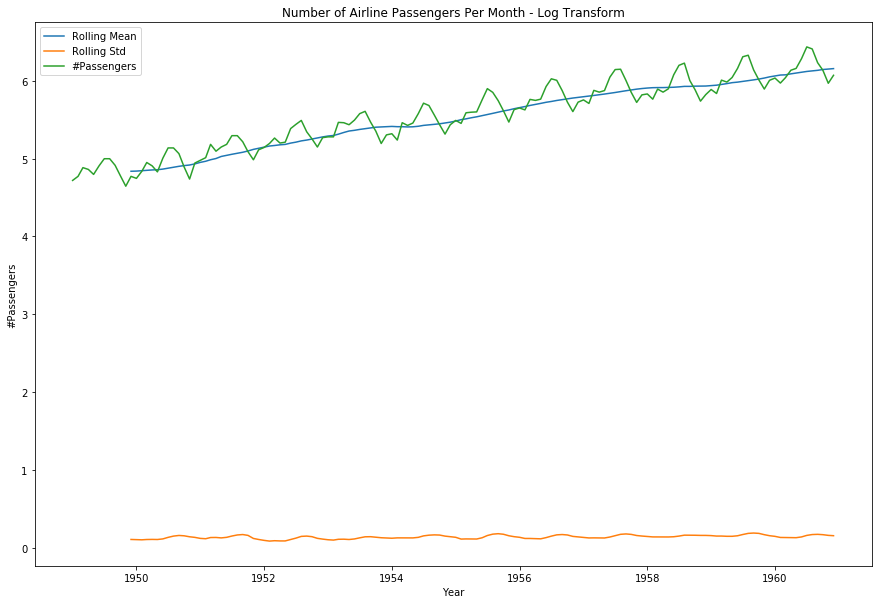

In [25]:
# Log transform timeseries and compare with original to check the effect
log_df = np.log(df)
log_rolmean = log_df.rolling(window = 12, center = False).mean()
log_rolstd = log_df.rolling(window = 12, center = False).std()

plt.figure(figsize=(15, 10))
plt.plot(log_rolmean, label='Rolling Mean')
plt.plot(log_rolstd, label='Rolling Std')
plt.plot(log_df, label='#Passengers')
plt.title('Number of Airline Passengers Per Month - Log Transform')
plt.xlabel('Year')
plt.ylabel('#Passengers')
plt.legend()
plt.show()

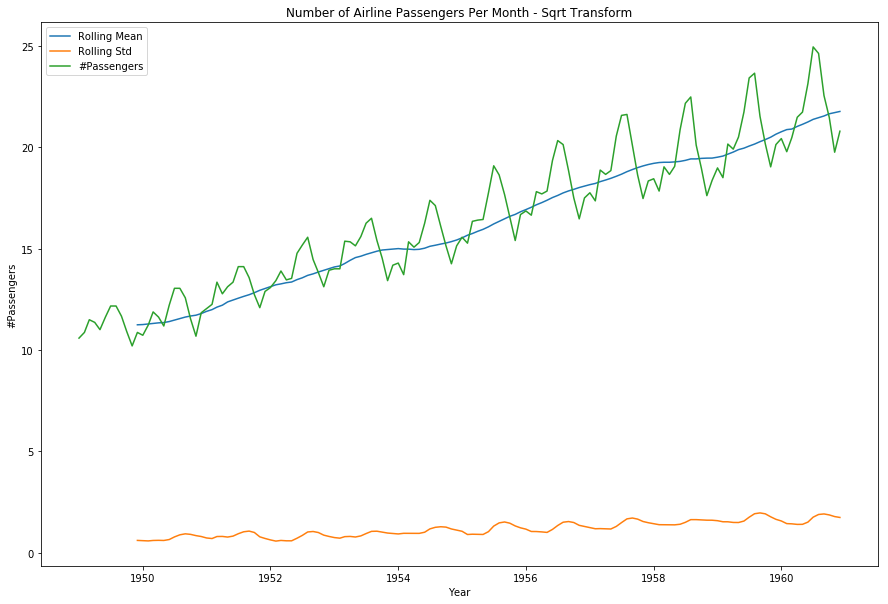

In [26]:
# Log transform timeseries and compare with original to check the effect
sqrt_df = np.sqrt(df)
sqrt_rolmean = sqrt_df.rolling(window = 12, center = False).mean()
sqrt_rolstd = sqrt_df.rolling(window = 12, center = False).std()

plt.figure(figsize=(15, 10))
plt.plot(sqrt_rolmean, label='Rolling Mean')
plt.plot(sqrt_rolstd, label='Rolling Std')
plt.plot(sqrt_df, label='#Passengers')
plt.title('Number of Airline Passengers Per Month - Sqrt Transform')
plt.xlabel('Year')
plt.ylabel('#Passengers')
plt.legend()
plt.show()

moving forward, let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

Create a rolling mean using your log transformed time series, with a time window of 7. Plot the log-transformed time series and the rolling mean together.

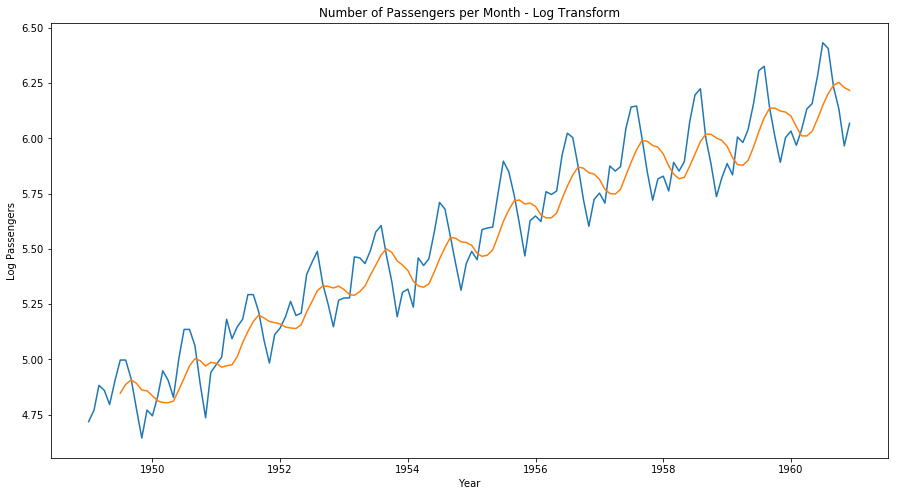

In [27]:
# your code here
df = log_df
rolmean = df.rolling(window=7, center=False).mean()

plt.figure(figsize=(15, 8))
plt.plot(df)
plt.plot(rolmean)
plt.xlabel('Year')
plt.ylabel('Log Passengers')
plt.title('Number of Passengers per Month - Log Transform')
plt.show()

Now, subtract the rolling mean from the time series, look at the 10 first elements of the result and plot the result.

In [28]:
# Subtract the moving average from the original data and check head for Nans
smoothed_df = (df - rolmean).dropna()
smoothed_df.head()

,#Passengers
Month,
1949-07-01,0.150059
1949-08-01,0.110242
1949-09-01,0.005404
1949-10-01,-0.113317
1949-11-01,-0.217275


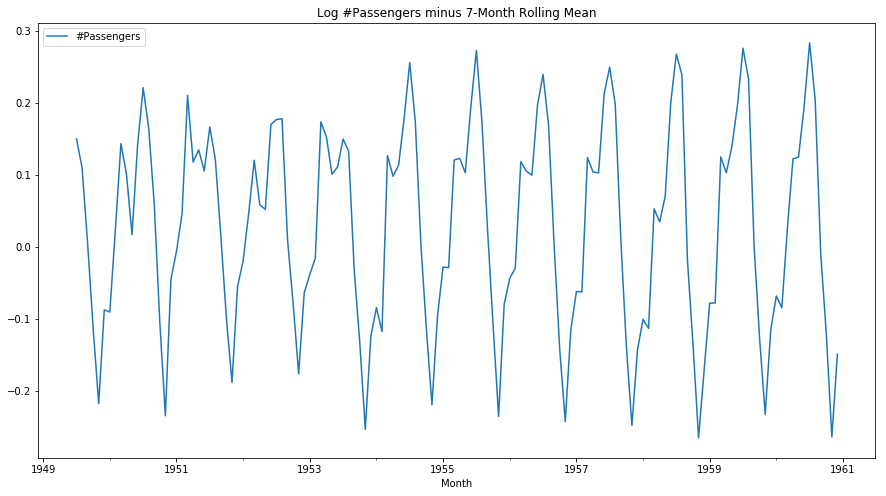

In [29]:
# Plot the result
smoothed_df.plot(figsize=(15, 8))
plt.title('Log #Passengers minus 7-Month Rolling Mean')
plt.show()

Finally, use your function `check_stationarity` to see if this series is considered stationary!

In [31]:
# Your code here
check_stationarity(smoothed_df);

Results of Dickey-Fuller Test:
{'#Lags Used': 14,
 'Critical Value': {'1%': -3.4846672514209773,
                    '10%': -2.5794629869786503,
                    '5%': -2.8853397507076006},
 'Number of Observations Used': 123,
 'Test statistic': -2.3480270028588084,
 'p-value': 0.15694559814096715}


### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


## Subtracting the weighted rolling mean

Repeat all the above for the *weighter* rolling mean. Start from the log-transformed data again. Compare the Dickey-Fuller Test results. What do you conclude?

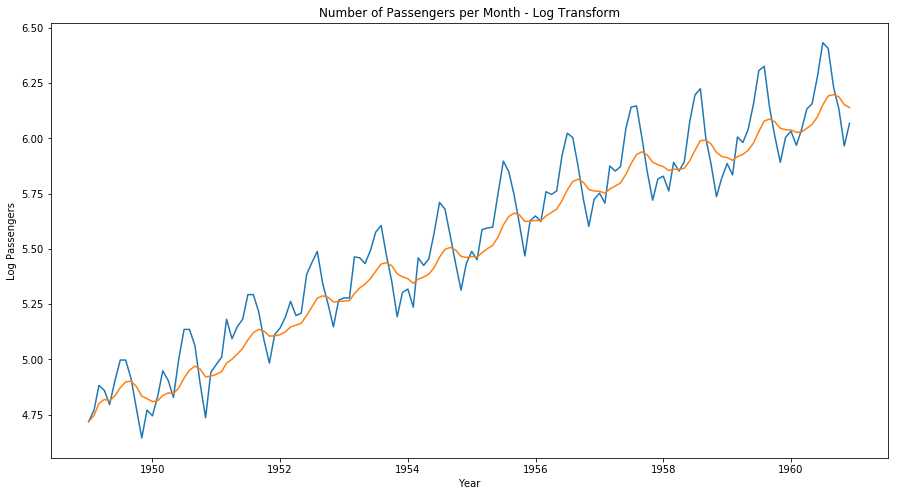

In [36]:
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log
exp_smoothed_df = df.ewm(halflife=4).mean()

# Plot the original data with exp weighted average
plt.figure(figsize=(15, 8))
plt.plot(df)
plt.plot(exp_smoothed_df)
plt.xlabel('Year')
plt.ylabel('Log Passengers')
plt.title('Number of Passengers per Month - Log Transform')
plt.show()

In [37]:
# Subtract the moving average from the original data and plot
smoothed_df = (df - exp_smoothed_df).dropna()

In [38]:
# do a stationarity check
check_stationarity(smoothed_df);

Results of Dickey-Fuller Test:
{'#Lags Used': 13,
 'Critical Value': {'1%': -3.4816817173418295,
                    '10%': -2.578770059171598,
                    '5%': -2.8840418343195267},
 'Number of Observations Used': 130,
 'Test statistic': -3.2972503220375127,
 'p-value': 0.015001833471825855}


### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


## Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right amount of `periods`. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, run the `stationarity check` again.

In [42]:
# difference your data and look at the head
diff_df = smoothed_df.diff(periods=12).dropna()
diff_df.head(15)

,#Passengers
Month,
1950-01-01,-0.063907
1950-02-01,-0.001185
1950-03-01,0.029307
1950-04-01,0.016168
1950-05-01,0.000194
1950-06-01,0.062669
1950-07-01,0.095524
1950-08-01,0.085827
1950-09-01,0.081834


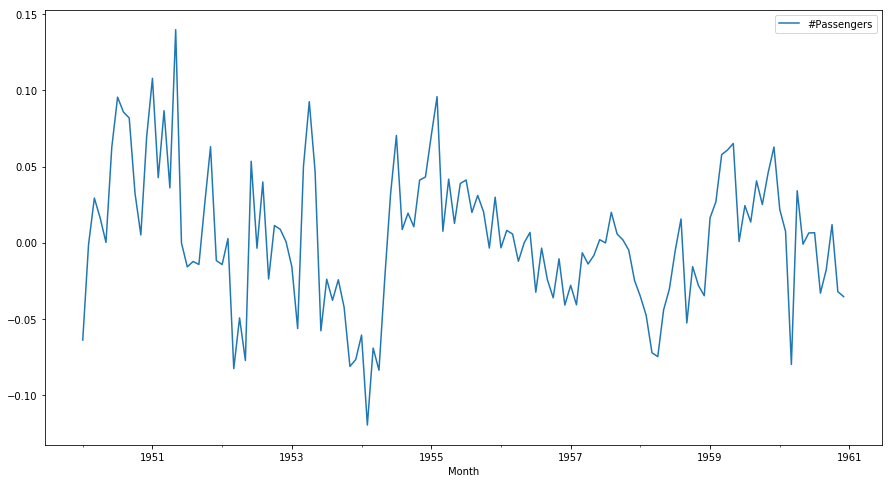

In [43]:
# plot your differenced time series
diff_df.plot(figsize=(15, 8))

In [15]:
# drop nas

In [45]:
# perform the stationarity check
check_stationarity(diff_df);

Results of Dickey-Fuller Test:
{'#Lags Used': 12,
 'Critical Value': {'1%': -3.4865346059036564,
                    '10%': -2.579896092790057,
                    '5%': -2.8861509858476264},
 'Number of Observations Used': 119,
 'Test statistic': -3.601666483537999,
 'p-value': 0.00572924796974271}


### Your conclusion

## Summary 

In this lab, you learned how to make time series stationary through using log transforms, rolling means and differencing.